Это описание здесь временное и ознакомительно, когда проект будет завершен, оформлять его буду отдельно со всеми ссылками и т.д.
### **Введение**
#### *Цель:*
В данном проекте главной и приоритетной целью является найти решение для созданий модели, которая будет переводить текст в речь моим голосом на русском языке.
#### Предпосылки
Данную задачу я решил реализовать исходя из своего хобби. Я занимаюсь производством видеоконтента на площадке YouTube. Создание видео состоит из четырех основных частей:
- Написание сюжета
- Запись и обработка голоса 
- Запись и подготовка графических материалов для видеоряда
- Монтаж видеоролика

Каждый из пунктов занимается разное количество времени и зависит от многих составляющих. По моим ощущениям запись голоса и его обработка может занимать от 25-35% временных трудозатрат. К тому же, т.к. у меня нет отдельного изолированного помещения для записи, это хобби доставляет неудобство и приходится выбирать и стыковать время с домашними. Ну и самособой, с соседями не договоришься, если кто то сверлит/ругается и т.д. - записи не бывать или же ее качество ухудшается.
#### Проблематика

Создание подобной модели:
- сократит общее время создания контента;
- высвободит временные ресурсы для фокусировки на других задачах
- сделает процесс более независимым
- снизит стресс
- улучшит общий домашний "фон"


### **О проекте и структуре**

Данный проект будет состоять из 4ех основных блоков:

- **1. [[Ресерч возможных решений и обучающих материалов в опенсорсе]]**
	- Поиск и анализ существующих решений
	- Поиск обучающих материалах в области TTS и Audio в целом
- **2. [[Создание корректного датасета]]**
	- Создание транскрипций
	- Запись и обработка голоса
	- Сборка датасета (metadata и т.д.)
- **3. [[Создание модели]]**
	- Написание кода
	- Обучение с нуля / дообучение (зависит от результатов ресерча)
	- Тестирование модели
- **4. [[Создание графического интерфейса для взаимодействия с моделью]]**
	- Предположительно Python+Django / Dart+Flutter


### Импорты

In [3]:
import os
import re
import pandas as pd
import numpy as np

### Создание корректного датасета

#### Генерация транскрипций

Казалось бы, датасет должен быть корректным, но это не так, постольку поскольку, я изначально записывал звук по 200-300слов, а это на одно аудио 2 минуты. Позже оказалось, что необходимо было писать отрезки 6-30секунд.

Да, кто то скажет, что можно разбить аудио и для этого есть куча сервисов! НО! Я не проф диктор, поэтому некоторые записи могли быть прерваны, я мог захотеть пить, чихнуть и т.д. Соответственно посередине предложение может быть оборвано и такую запись без программы не разделить, вернее ее можно разделить, но тогда нумерация собьется и потом ищи свищи, где не совпадают транскрипции.)))


В общем, у меня есть n файлов .txt, в которых тексты по 300+- слов, соответственно, необходимо написать код, который каждый из этих файлов откроет, разделит на предложения и сохранит каждый файлик отдельно с корректной нумерацией! Погнали!

In [5]:
# путь каталога с исходными текстовыми файлами
path_to_texts = './data/texts_full'
# путь до папки. куда буду сохранять транскрипции
path_to_transcriptions = './data/dataset/transcriptions'

In [6]:
# посмотрим на содержание папки с данными
print(*os.listdir(path_to_texts), sep = '\n')

01. 10 текстов на тему Технологии.txt
02. 10 текстов на тему Образование.txt
03. 10 текстов на тему Здоровый образ жизни.txt
04. 10 текстов на тему Экология.txt
05. 10 текстов на тему Наука.txt
06. 12 текстов на тему Искусство и культура.txt
07. 12 текстов на тему История.txt
08. 12 текстов на тему Экономика.txt
09. 12 текстов на тему Политика.txt
10. 12 текстов на тему Психология.txt
11. 12 текстов на тему Видеоигры.txt
12. 12 текстов на тему Архитектура.txt
13. 12 текстов на тему Кулинария.txt
14. 12 текстов на тему Домашние животные.txt
15. 12 текстов на тему Звукозапись.txt


Для того, чтобы написать алгоритм открытия, обработки и сохранения транскрипицй из текста, необходимо вспомнить, что я там ваял)

Ибо создавались эти тексты аж полгода назад!)

In [7]:
text_01 = open(path_to_texts + '/01. 10 текстов на тему Технологии.txt', 'r', encoding='windows-1251')
content = text_01.read()
print(content)

TextCut

Технологии изменяют наш мир с невероятной скоростью, внедряя инновации во все аспекты нашей жизни. Одной из наиболее заметных тенденций последних лет является развитие Интернета вещей. IoT позволяет соединять физические устройства с интернетом, что позволяет им взаимодействовать друг с другом и обмениваться данными. Это открывает новые возможности для автоматизации домов, офисов и даже целых городов, делая их более умными и эффективными.

С развитием IoT возрастает необходимость в обеспечении безопасности данных. Кибербезопасность становится приоритетом для многих компаний и организаций, так как количество кибератак и утечек данных продолжает расти. Новые технологии, такие как блокчейн и квантовая криптография, предлагают инновационные решения для защиты данных. Блокчейн обеспечивает прозрачность и неизменяемость записей, а квантовая криптография использует принципы квантовой механики для создания практически не взламываемых ключей шифрования.

Искусственный интеллект и машинн

Прекрасно, 1 файл содержит 10-12 текстов на определенную тему.

Каждый текст разделен от другого с помощью ('\n TextCut \n').

Конечная цель - разделить все 10 текстов на предложения.

1 предложение = 1 транскрипция

Сохранить каждую транскрипцию и закодировать в utf-8, чтобы не было проблем.

Каждой транскрипции должен быть присвоен свой ID в соответствии с темой текста, номер текста, номером предложения в тексте. 

010310 - Технологии_03 текст_10 предложение.

На самом деле это необязательно, но я хочу так сделать, чотбы в будущем, если мне понадобится решать задачу, например для определения жанра текста, я мог эти предложения дополнительно классифицировать жанр-метка.

Ну мало ли пригодится =)

Алгоритм примерно следующий:
- Цикл итерации по всем файлам for theme_number, file in enumerate(файлстемой.txt): 
    - Файл открывается;
    - Все переносы текста удаляются;
    - Все 'TextCut' удаляются;
    - Формируется список транскрипций, разделитель ('.');
    - Каждая строка проверяется, чтобы не попали лишние пробелы и т.д. len(str) > 2 ;
    - Сохраняем каждую транскрипцию по пути:"путь_до_транскрипций":
        - Наименование файла составляется из theme_number + номер транскрипции

In [8]:
# замена всех переносов текста
content = content.replace('\n', '')
# замена всех разделителей текстов (нет особого смысла делать список списков)
content = content.replace('TextCut', '')

lst = content.split('.')
print(*lst, sep='\n')
print(len(lst))

Технологии изменяют наш мир с невероятной скоростью, внедряя инновации во все аспекты нашей жизни
 Одной из наиболее заметных тенденций последних лет является развитие Интернета вещей
 IoT позволяет соединять физические устройства с интернетом, что позволяет им взаимодействовать друг с другом и обмениваться данными
 Это открывает новые возможности для автоматизации домов, офисов и даже целых городов, делая их более умными и эффективными
С развитием IoT возрастает необходимость в обеспечении безопасности данных
 Кибербезопасность становится приоритетом для многих компаний и организаций, так как количество кибератак и утечек данных продолжает расти
 Новые технологии, такие как блокчейн и квантовая криптография, предлагают инновационные решения для защиты данных
 Блокчейн обеспечивает прозрачность и неизменяемость записей, а квантовая криптография использует принципы квантовой механики для создания практически не взламываемых ключей шифрования
Искусственный интеллект и машинное обучение т

In [9]:
# Фактически транскрипций должно быть 112, так что лучше ввести финальную проверку на длину строки
# Так же необходимо убрать лишние пробелы в начале и в конце каждой строки
# пересоздадим список на основе существующего
lst = [s.strip() for s in lst if len(s) >= 2]

print(f'Всего: {len(lst)} транскрипций')

Всего: 112 транскрипций


In [10]:
# теперь необходимо их сохранить, каждую отдельным файлом, с названием "01НомерТранскрипции"
for i, line in enumerate(lst, start=1):
    filename = os.path.join(path_to_transcriptions, f'01{i:03}.txt')
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(line)

print(f"Сохранено {len(lst)} файлов в {path_to_transcriptions}")

Сохранено 112 файлов в ./data/dataset/transcriptions


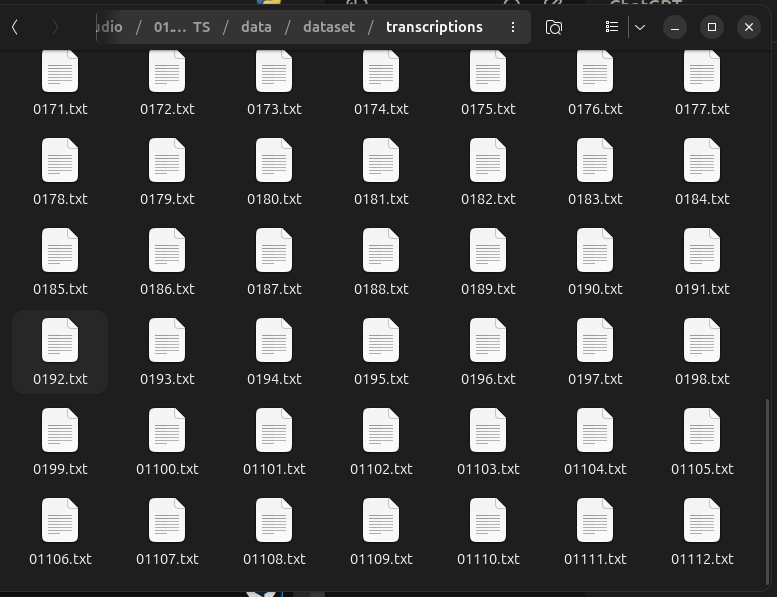

Ну вообще шикардос, теперь необходимо, все вот это дело сделать для ВСЕХ текстов и чтобы пронумеровалось все корректна!)

In [15]:
def MakeTranscriptions(filepath, path_to_save):
    counter = 0
    # список
    for i, filename in enumerate(os.listdir(filepath)):
        print(f'Номер обрабатываемого файла: {i + 1}')
        text = open(path_to_texts + '/' + filename, 'r', encoding='windows-1251')
        content = text.read()
        # замена всех переносов текста
        content = content.replace('\n', '')
        # замена всех разделителей текстов
        content = content.replace('TextCut', '')
        lst = content.split('.')
        # пересборка списка с удалением лишних пробелов в начале и конце строки и без пустых транскрипций
        lst = [s.strip() for s in lst if len(s) >= 2] 
        print(f'----Всего: {len(lst)} транскрипций')
        counter += len(lst)
        # теперь необходимо их сохранить, каждую отдельным файлом, с названием "01НомерТранскрипции"
        for j, line in enumerate(lst, start=1):
            if i + 1 < 10:
                filename = os.path.join(path_to_save, f'0{i + 1}{j:03}.txt')
                with open(filename, 'w', encoding='utf-8') as f:
                    f.write(line)
            else:
                filename = os.path.join(path_to_save, f'{i + 1}{j:03}.txt')
                with open(filename, 'w', encoding='utf-8') as f:
                    f.write(line)
        print(f"Сохранено {len(lst)} файлов в {path_to_save}")

    print(f'Всего сохранено: {counter} транскрипций')

In [16]:
MakeTranscriptions(path_to_texts, path_to_transcriptions)

Номер обрабатываемого файла: 1
----Всего: 112 транскрипций
Сохранено 112 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 2
----Всего: 105 транскрипций
Сохранено 105 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 3
----Всего: 119 транскрипций
Сохранено 119 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 4
----Всего: 113 транскрипций
Сохранено 113 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 5
----Всего: 103 транскрипций
Сохранено 103 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 6
----Всего: 112 транскрипций
Сохранено 112 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 7
----Всего: 110 транскрипций
Сохранено 110 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 8
----Всего: 120 транскрипций
Сохранено 120 файлов в ./data/dataset/transcriptions
Номер обрабатываемого файла: 9
----Всего: 117 транскрипций
Сохранено 117 файлов в ./data/dataset/transcr

Ну, вроде бы выглядит прям красиво)
Далее необходимо все это преобразовать в метафайлик:
     ID | Путь_До_Транскрипции | Транскрипция | Путь_До_Аудиофайла

Постольку, поскольку я благополучно случайно дропнул все свои записи, мне придется их записать вновь.

Благо, у меня остался небольшая часть, и я могу писать код по дообучению и тестировать его работоспособность на небольшом фрагменте данных, а остальные постепенно записать!

#### Создание файла метаданных

### Установка CoquiTTS

Я решил, все таки начать с Coqui XTTS v2. 

Они позволяют файнтюнить свои модели, есть туториалы различные и вроде бы неплохая поддержка и различные описания на офф сайте и гитхабе.

[Документация XTTS](https://docs.coqui.ai/en/latest/models/xtts.html)

[Гитхаб TTS](https://github.com/coqui-ai/TTS)

[Hugging Face XTTS](https://huggingface.co/coqui/XTTS-v2)

Интересный опыт с виртуальными окружениями.

У меня используется версия python 3.12, но CoquiTTS поддерживает 3.7 <= CoquiTTX < 3.11.

Соответственно мне придется установить версию 3.10, создать новое виртуальное окружение и уже после этого пробовать дообучать нейронку)

Интересна!)

In [6]:
# Установил пайтон 3.10!
!python3 --version

Python 3.10.16


In [7]:
# обновление PyPI
#!python3 -m pip install --upgrade pip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 6.8 MB/s eta 0:00:007.9 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1


In [8]:
#!python3 -m pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 20.0 MB/s eta 0:00:0031m6.1 MB/s eta 0:00:01


In [10]:
# !pip install TTS  # from PyPI

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 31.0 MB/s eta 0:00:00 MB/s eta 0:00:0102
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 17.0 MB/s eta 0:00:00MB/s eta 0:00:01
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Installing build dependencies ... one
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 30.5 MB/s eta 0

In [12]:
#!pip install librosa

In [22]:
#!pip install soundfile

In [26]:
# посмотрим, все ли гуд!
!pip show librosa soundfile

Name: librosa
Version: 0.10.0
Summary: Python module for audio and music processing
Home-page: https://librosa.org
Author: Brian McFee, librosa development team
Author-email: brian.mcfee@nyu.edu
License: ISC
Location: /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/Audio/01.Talium_TTS/TTSenv310/lib/python3.10/site-packages
Requires: audioread, decorator, joblib, lazy-loader, msgpack, numba, numpy, pooch, scikit-learn, scipy, soundfile, soxr, typing-extensions
Required-by: TTS
---
Name: soundfile
Version: 0.13.1
Summary: An audio library based on libsndfile, CFFI and NumPy
Home-page: https://github.com/bastibe/python-soundfile
Author: Bastian Bechtold
Author-email: basti@bastibe.de
License: BSD 3-Clause License
Location: /media/talium/1DA5AE943A305AF1/DataSciense/Projects/PetProjects/Audio/01.Talium_TTS/TTSenv310/lib/python3.10/site-packages
Requires: cffi, numpy
Required-by: librosa, trainer, TTS


Чтож: 
- Python 3.10 я накатил
- Новую виртуалку создал
- Необходимое на данном этапе загрузил
- Пока в ноутбуке работать не буду, необходимо разместить и проверить фрагмент датасета, для дальнейшей работы, и спланировать все)

На сегодня тут пока что усей!